<a href="https://colab.research.google.com/github/i-SanMartin/IAnotebooks/blob/main/IA_Notebook%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [ ]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K
from keras.preprocessing import image

In [ ]:
iv3 = InceptionV3()

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
x = image.img_to_array(image.load_img("gdrive/MyDrive/movil/gun.jpg", target_size=(299, 299)))#Nos interesa que sea de 299x299 pixeles

#InceptionV3 utiliza un rango de -1 a 1 para los colores, cambio de rango:
x /= 255
x -= 0.5
x *= 2

x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = iv3.predict(x)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [ ]:
decode_predictions(y)

[[('n04086273', 'revolver', 0.6241377),
  ('n04090263', 'rifle', 0.07897153),
  ('n02749479', 'assault_rifle', 0.04957097),
  ('n02951585', 'can_opener', 0.014174413),
  ('n03527444', 'holster', 0.012450189)]]

**ATAQUES ADVERSARIOS**

In [ ]:
#Sacar el nodo de entrada y el de salida
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

#Queremos que en vez de predecir revolver predizca la clase limon(referenciada con 951)
target_class = 951

#La funcion de coste que queremos es la probabilidad de que la imagen sea limón
loss = out_layer[0, target_class]

#Encontrar nuestro gradiente entre el error y la variable de entrada(en vez de los parametros como en una nn)
#El gradiente será un tensor cuyos valores nos dirán en que proporcion tenemos que variar los pixeles
grad = K.gradients(loss, inp_layer)[0]
adv = np.copy(x)

optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

pert = 0.01#Perturbación de la imagen adversaria
max_pert = x + pert
min_pert = x - pert

cost = 0.0

while cost < 0.95:
  gr, cost= optimize_gradient([adv, 0])

  adv +=gr
  adv = np.clip(adv, min_pert, max_pert)#Limitamos la perturbación
  adv = np.clip(adv, -1, 1)
  print("Target cost:", cost)

Target cost: 0.00014960236
Target cost: 0.00015620531
Target cost: 0.00016294069
Target cost: 0.0001696692
Target cost: 0.00017658246
Target cost: 0.00018375726
Target cost: 0.00019143084
Target cost: 0.0001992979
Target cost: 0.00020751251
Target cost: 0.00021551758
Target cost: 0.00022329207
Target cost: 0.00023142423
Target cost: 0.00024001297
Target cost: 0.00024897745
Target cost: 0.00025806666
Target cost: 0.00026731
Target cost: 0.00027644716
Target cost: 0.00028603274
Target cost: 0.00029592618
Target cost: 0.00030630568
Target cost: 0.00031687488
Target cost: 0.00032791815
Target cost: 0.00033916326
Target cost: 0.0003507524
Target cost: 0.0003621219
Target cost: 0.0003738089
Target cost: 0.0003856755
Target cost: 0.0003978058
Target cost: 0.00041032632
Target cost: 0.00042256108
Target cost: 0.00043498384
Target cost: 0.0004477803
Target cost: 0.00046082377
Target cost: 0.00047372558
Target cost: 0.00048699402
Target cost: 0.0005007163
Target cost: 0.0005148876
Target cost: 0

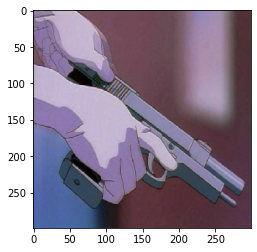

In [ ]:
#VAmos a ver como la imagen y la adversaria
_adv = np.copy(adv)
_adv /= 2
_adv += 0.5
_adv *= 255

plt.imshow(_adv[0].astype(np.uint8))#Indice 0 para mostrar la primera imagen del tensor
plt.show()


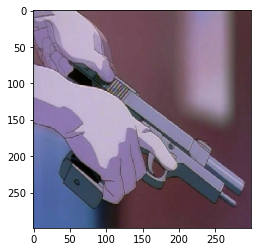

In [ ]:
_x = np.copy(x)
_x /= 2
_x += 0.5
_x *= 255

plt.imshow(_x[0].astype(np.uint8))
plt.show()

In [ ]:
predict = iv3.predict(adv)
decode_predictions(predict)

[[('n07749582', 'lemon', 0.9992893),
  ('n07747607', 'orange', 0.000447905),
  ('n07742313', 'Granny_Smith', 0.00012081026),
  ('n07753592', 'banana', 1.2699546e-05),
  ('n07716906', 'spaghetti_squash', 1.257703e-05)]]